<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/logistic_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Logistic Regression

## Definition:
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.

The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category, and it can also be used to predict the probabilities. 

Advantages: 
1. Logistic regression is easier to implement, interpret, and very efficient to train.

2. It makes no assumptions about distributions of classes in feature space.

3. It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.

4. It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).

5. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.

6. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.




Disadvantages:
1. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

2. The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

3. It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.

4. Logistic Regression requires average or no multicollinearity between independent variables.

5. It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

<img src="https://www.saedsayad.com/images/LogReg_1.png" width="700" height="400">


---

---

## Description of this project:
###The Goal of this project: 
Given the Red wine infomation, I want to predict the quality of the red wine. We will consider the quality score higher than 6 as Good quality (INDEX = 1), and the quality score lower or equal to 6 is Bad quality(INDEX = 0).

First, I will use binary features to make a prediction on the quality of red wine. Two features that I choose is 'density' and 'alcohol'. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTObdH1BSFS8vHzG1mJoWACYVQTHxuF_GdFHw&usqp=CAU" width="700" height="300">

In this dataset, each example (X, Y) belongs to one of two complementary classes, and each example are independent of each other. So we need to assume all examples are generated under the same distribution:

$$ P(y|x)=\left\{
\begin{aligned}
\hat{y}  \textrm{  if  }  y = 1 \\
1-\hat{y}  \textrm{  if  }  y = 0
\end{aligned}
\right.
$$\
\begin{align}
P(y|x) &= (\hat{y})^y (1 - \hat{y}) ^{1-y}\\
logP(y|x) &= (\hat{y})*y *(1 - \hat{y}) *{1-y}
\end{align}
In here, we want to maximize $logP(y|x)$ which is equivalent to minimize $-logP(y|x)$. 

### Recall
\begin{align}
\hat{y} &= \sigma(z)(1 - \sigma(z))\\
\frac{d}{dx}[logf(x)]&= \frac{1}{f(x)} \frac{1}{ln10}f'(x)\\
L(w, y) &= -ylogσ(z) - (1-y) log(1-σ(z))\\
\frac{L(w, y)}{dw_{1}} &= \frac{d}{dw_1} [-ylogσ(z) - (1-y) log(1-σ(z))]\\
&= -y \frac{d}{dw_1} logσ(z) - (1-y) \frac{d}{dw_1}log(1-σ(z))\\
\frac{d}{dw_1} logσ(z) &= \frac{1-σ(z)}{ln10}x_1\\
\frac{d}{dw_1}log(1-σ(z)) &= -\frac{σ(z)}{ln10}x_1\\
\frac{L(w, y)}{dw_{1}} &= -\frac{x_1}{ln10}(σ(z) - y )\\
&= x_1(\hat{y} - y)\\
\frac{L(w, y)}{dw_{2}} &= x_2(\hat{y} - y)\\
\frac{L(w, y)}{dw_{3}} &= (\hat{y} - y)
\end{align}
The whole procedure of training our neural network:

1. Randomly select (x,y) from the training set.

2. Feed-Froward into the Neural Network. 

3. Update Weights and Bias. 
\begin{align}
w_1 &= w_1 - \alpha (\hat{y} - y) x_1\\
w_2 &= w_2 - \alpha (\hat{y} - y) x_2\\
b &= b - \alpha (\hat{y} - y)
\end{align}

4. Repeat Steps 1-3 until desired Loss in-sample is reached or the maximum number of steps is reached. 
---

---

## Data
In this assignment, we will explore Logistic Regression method on a dataset named "Red wine". It contains 1599 samples,12 columns. Download link is: [link](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality

## Packages
The following packages will be needed to run the code below:

*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)


---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


%matplotlib inline 

---


## Data Preprocessing


---

In [6]:
wine = pd.read_csv('winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data = wine[['density', 'alcohol', 'quality']]
data

,density,alcohol,quality
0,0.99780,9.4,5
1,0.99680,9.8,5
2,0.99700,9.8,5
3,0.99800,9.8,6
4,0.99780,9.4,5
...,...,...,...
1594,0.99490,10.5,5
1595,0.99512,11.2,6
1596,0.99574,11.0,6
1597,0.99547,10.2,5


---

Convert the quality column to 0 and 1 based on the previous quality score. 

---

In [8]:
data['quality'] = np.where(data['quality'] > 6, 1, 0)
data['quality'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    1382
1     217
Name: quality, dtype: int64

In [9]:
X = data[['density', 'alcohol']].to_numpy()

In [10]:
Y = data['quality'].to_numpy()

---

Plot the data set to see the distribution of the data points. 

---

In [11]:
# You're going to have to figure out what this stuff is by playing with it!
#X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
#X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

#X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
#X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

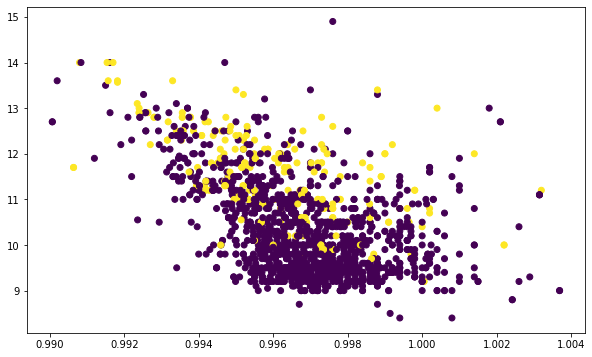

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)

Text(0, 0.5, 'Good quality or Bad quality')

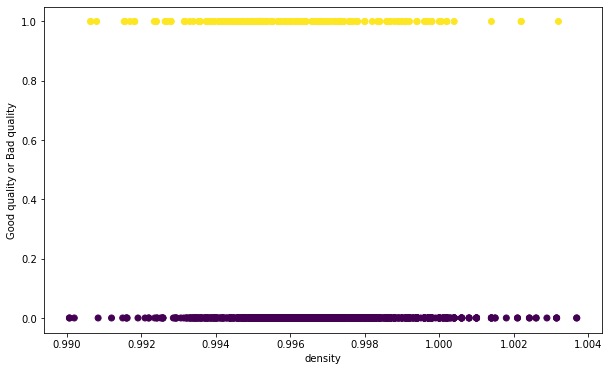

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("density")
plt.ylabel("Good quality or Bad quality")

---

Plot the sigmoid function that we defined. 


---

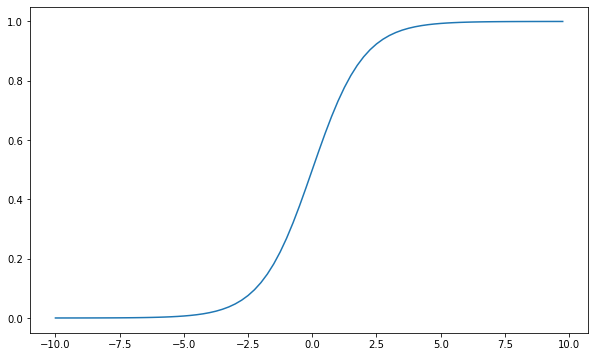

In [14]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

---

Define the Loss function which derivation has been shown in the begining of this project.

---

In [15]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

In [16]:
cross_entropy_loss(1.0, .5)

0.6931471805599453

---


Define derivative of the loss entropy loss and also define a feed forward function (feed into sigmoid function)


---

In [17]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

In [18]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.25
feed_forward(X[0], w, b)

0.00011898056799628018

---


## Implement Stochastic Gradient Descent 



---

In [19]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 1406.8942545195557
Total Loss at time 1001 = 932.1085992787926
Total Loss at time 2001 = 726.8650272109475
Total Loss at time 3001 = 1249.1362288050566
Total Loss at time 4001 = 695.9682530650757
Total Loss at time 5001 = 597.9458206476671
Total Loss at time 6001 = 704.9817388330472
Total Loss at time 7001 = 569.0249371461099
Total Loss at time 8001 = 545.0116315466527
Total Loss at time 9001 = 723.3653350315864


---


Define Prediction function



---

In [20]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

---


Make a Prediction on the test data, and see if the predictions and actual data have an agreement.


---

In [21]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 86.24140087554721%


---

#Logistic Regression with all features



---

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
col = wine.columns
X = wine[col[:-1]].to_numpy()

In [36]:
Y = wine[col[-1]].to_numpy()

In [39]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, shuffle=True)

In [40]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [41]:
regressor=LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)
regressor.fit(X_train,Y_train)

score=regressor.score(X_test,Y_test)
print(f'accuracy = {100 * score}%')

accuracy = 60.3125%


According to the result we can find out that if we use all feature to make prediction, the accuracy becomes much lower than the accuracy of using only 2 features. Therefore, we can know that not all features are relevant to the outcome. 